In [125]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [126]:
#Loading data into dataset

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,HTTPS,Favicon,HTTPSDomainURL,...,WebsiteForwarding,StatusBarCust,DisableRightClick,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,StatsReport,class
0,0,1,1,1,1,1,-1,1,1,-1,...,0,1,1,1,-1,-1,0,-1,1,-1
1,1,1,0,1,1,1,-1,-1,1,-1,...,0,1,1,1,1,-1,1,-1,-1,-1
2,2,1,0,1,1,1,-1,-1,1,-1,...,0,1,1,1,-1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,1,...,0,-1,1,1,-1,-1,0,-1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,0,1,1,1,1,1,1,-1,-1,1


In [127]:
#Shape of dataset
data.shape

(11054, 26)

In [128]:
#Listing the features of the dataset
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'HTTPS', 'Favicon', 'HTTPSDomainURL', 'RequestURL',
       'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail',
       'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust',
       'DisableRightClick', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'StatsReport', 'class'],
      dtype='object')

In [129]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Index              11054 non-null  int64
 1   UsingIP            11054 non-null  int64
 2   LongURL            11054 non-null  int64
 3   ShortURL           11054 non-null  int64
 4   Symbol@            11054 non-null  int64
 5   Redirecting//      11054 non-null  int64
 6   PrefixSuffix-      11054 non-null  int64
 7   HTTPS              11054 non-null  int64
 8   Favicon            11054 non-null  int64
 9   HTTPSDomainURL     11054 non-null  int64
 10  RequestURL         11054 non-null  int64
 11  AnchorURL          11054 non-null  int64
 12  LinksInScriptTags  11054 non-null  int64
 13  ServerFormHandler  11054 non-null  int64
 14  InfoEmail          11054 non-null  int64
 15  AbnormalURL        11054 non-null  int64
 16  WebsiteForwarding  11054 non-null  int64
 17  StatusBarCus

In [130]:
# nunique value in columns
data.nunique()

Index                11054
UsingIP                  2
LongURL                  3
ShortURL                 2
Symbol@                  2
Redirecting//            2
PrefixSuffix-            2
HTTPS                    3
Favicon                  2
HTTPSDomainURL           2
RequestURL               2
AnchorURL                3
LinksInScriptTags        3
ServerFormHandler        3
InfoEmail                2
AbnormalURL              2
WebsiteForwarding        2
StatusBarCust            2
DisableRightClick        2
IframeRedirection        2
AgeofDomain              2
DNSRecording             2
WebsiteTraffic           3
PageRank                 2
StatsReport              2
class                    2
dtype: int64

In [131]:
#droping index column
data = data.drop(['Index'],axis = 1)

In [132]:
#description of dataset
data.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,HTTPS,Favicon,HTTPSDomainURL,RequestURL,...,WebsiteForwarding,StatusBarCust,DisableRightClick,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.251040,0.628551,0.675231,0.186720,...,0.115705,0.762077,0.913877,0.816899,0.061335,0.377239,0.287407,-0.483626,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.911856,0.777804,0.737640,0.982458,...,0.319885,0.647516,0.406009,0.576807,0.998162,0.926158,0.827680,0.875314,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,...,0.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
# Splitting the dataset

X = data.drop(["class"],axis =1)    # contains features
y = data["class"]               # contains lebles

In [134]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 24), (8843,), (2211, 24), (2211,))

In [135]:
# creating list to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [136]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [137]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [138]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.952
Support Vector Machine : Accuracy on test Data: 0.944

Support Vector Machine : f1_score on training Data: 0.957
Support Vector Machine : f1_score on test Data: 0.951

Support Vector Machine : Recall on training Data: 0.968
Support Vector Machine : Recall on test Data: 0.964

Support Vector Machine : precision on training Data: 0.947
Support Vector Machine : precision on test Data: 0.938


In [139]:
#storing the results

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [140]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [141]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [142]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.972
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 0.975
Decision Tree : f1_score on test Data: 0.963

Decision Tree : Recall on training Data: 0.970
Decision Tree : Recall on test Data: 0.959

Decision Tree : precision on training Data: 0.979
Decision Tree : precision on test Data: 0.967


In [143]:
#storing the results

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [144]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [145]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [146]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.970
Gradient Boosting Classifier : Accuracy on test Data: 0.956

Gradient Boosting Classifier : f1_score on training Data: 0.973
Gradient Boosting Classifier : f1_score on test Data: 0.961

Gradient Boosting Classifier : Recall on training Data: 0.969
Gradient Boosting Classifier : Recall on test Data: 0.959

Gradient Boosting Classifier : precision on training Data: 0.977
Gradient Boosting Classifier : precision on test Data: 0.963


In [147]:
#storing the results

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [148]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [149]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [150]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.971
Random Forest : Accuracy on test Data: 0.955

Random Forest : f1_score on training Data: 0.974
Random Forest : f1_score on test Data: 0.960

Random Forest : Recall on training Data: 0.971
Random Forest : Recall on test Data: 0.960

Random Forest : precision on training Data: 0.977
Random Forest : precision on test Data: 0.967


In [151]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [152]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Support Vector Machine,0.944,0.951,0.968,0.947
1,Decision Tree,0.958,0.963,0.970,0.979
2,Gradient Boosting Classifier,0.956,0.961,0.969,0.977
3,Random Forest,0.955,0.960,0.971,0.977


In [153]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [154]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

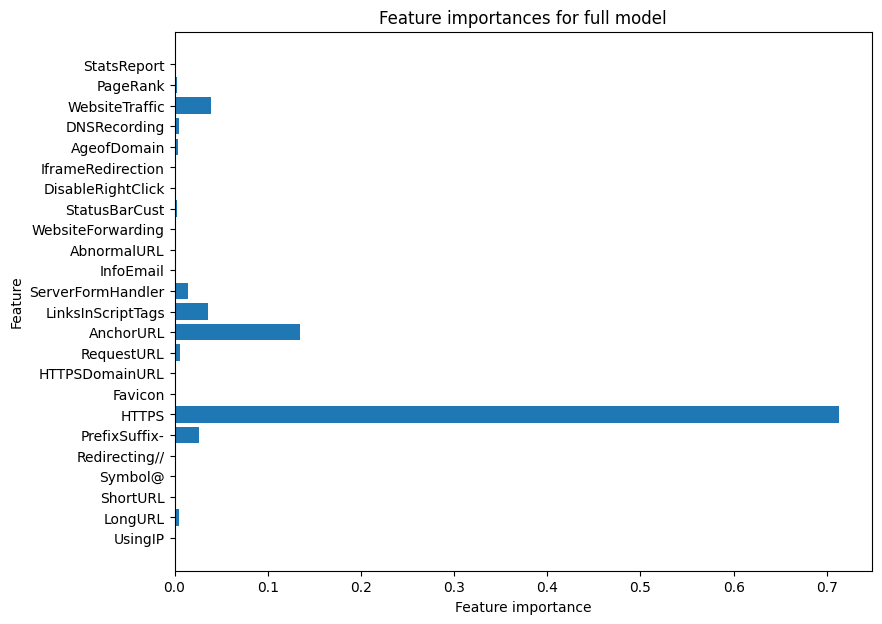

In [155]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances for full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()